In [6]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
from imutils import contours
import numpy as np
import imutils
import cv2

In [49]:
def showIMG(image):
    plt.imshow(image)

In [4]:
ANSWER_KEY = {0: 1, 1: 4, 2: 0, 3: 3, 4: 1}

In [18]:
image = cv2.imread("images/test_01.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
edged = cv2.Canny(blurred, 75, 200)

In [20]:
cnts = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [23]:
docCnt = None

In [26]:
if len(cnts):
    cnts = sorted(cnts,key = cv2.contourArea,reverse=True)
    for cnt in cnts:
        peri = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,0.02*peri,True)
        
        if len(approx) == 4:
            docCnt = approx
            break

In [67]:
paper = four_point_transform(image,docCnt.reshape(4,2))
warped = four_point_transform(gray,docCnt.reshape(4,2))
thresh = cv2.threshold(warped, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

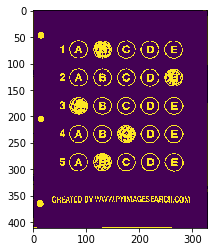

In [68]:
showIMG(thresh)

In [69]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
questions = []

In [70]:
for cnt in cnts:
    (x,y,w,h) = cv2.boundingRect(cnt)
    ar = w/float(h)
    if w>=20 and h>=20 and ar>=0.9 and ar<=1.1:
        questions.append(cnt)

In [71]:
questions = contours.sort_contours(questions,method="top-to-bottom")[0]
correct = 0

In [72]:
for q,i in enumerate(np.arange(0,len(questions),5)):
    cnts = contours.sort_contours(questions[i:i+5])[0]
    bubbled = None
    
    for j,c in enumerate(cnts):
        mask = np.zeros(thresh.shape,dtype="uint8")
        cv2.drawContours(mask,[c],-1,255,-1)
        mask = cv2.bitwise_and(thresh,thresh,mask=mask)
        total = cv2.countNonZero(mask)
        
        if not bubbled or total > bubbled[0]:
            bubbled = (total,j)
    
    color = (0,0,255)
    k = ANSWER_KEY[q]
    
    if bubbled[1]==k:
        color=(0,255,0)
        correct+=1
    cv2.drawContours(paper,[cnts[k]],-1,color,3)

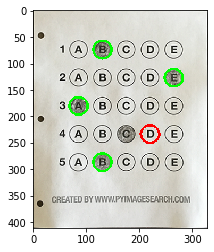

In [74]:
showIMG(paper[:,:,::-1])

In [80]:
score = (correct/5)*100
text = "{:.2f}%".format(score)
print("Score is: ",text)
paper = cv2.putText(paper,text,(10,30),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,0,255),2)

Score is:  80.00%


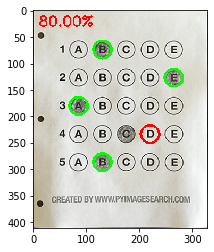

In [81]:
showIMG(paper[:,:,::-1])